<a href="https://colab.research.google.com/github/OMPRAKASHKARRI/karkhana-nxtwaveassignment/blob/main/nxtwaveassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

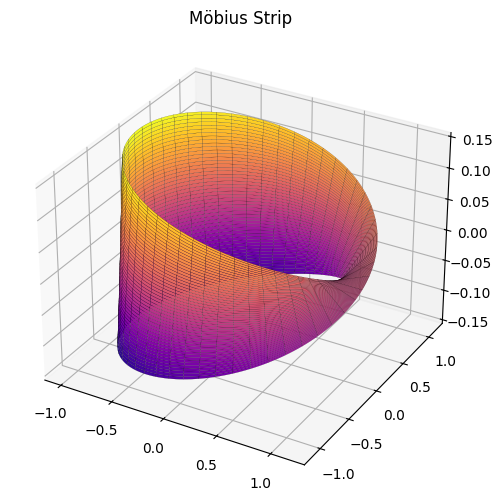

Surface Area ≈ 1.9054
Edge Length ≈ 12.6633


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=100):
        # Initialize Möbius strip parameters and meshgrid for u and v
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self.compute_mesh()  # Compute 3D coordinates

    def compute_mesh(self):
        # Generate 3D mesh using parametric equations
        U = self.U
        V = self.V
        R = self.R

        X = (R + V * np.cos(U / 2)) * np.cos(U)
        Y = (R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def surface_area(self):
        # Approximate surface area using cross product of partial derivatives
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)

        # Compute partial derivatives w.r.t. u and v
        Xu = np.gradient(self.X, du, axis=1)
        Yu = np.gradient(self.Y, du, axis=1)
        Zu = np.gradient(self.Z, du, axis=1)

        Xv = np.gradient(self.X, dv, axis=0)
        Yv = np.gradient(self.Y, dv, axis=0)
        Zv = np.gradient(self.Z, dv, axis=0)

        # Calculate cross product of tangent vectors
        cross_x = Yu * Zv - Zu * Yv
        cross_y = Zu * Xv - Xu * Zv
        cross_z = Xu * Yv - Yu * Xv

        # Magnitude of the cross product gives local area element
        area_element = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)
        area = np.sum(area_element) * du * dv  # Total surface area
        return area

    def edge_length(self):
        # Approximate total edge length along both boundaries (v = ±w/2)
        u = self.u
        v_vals = [self.w / 2, -self.w / 2]
        total_length = 0

        for v in v_vals:
            # Compute boundary coordinates
            x = (self.R + v * np.cos(u / 2)) * np.cos(u)
            y = (self.R + v * np.cos(u / 2)) * np.sin(u)
            z = v * np.sin(u / 2)

            # Compute arc length using derivatives
            dx = np.gradient(x, u)
            dy = np.gradient(y, u)
            dz = np.gradient(z, u)

            dl = np.sqrt(dx**2 + dy**2 + dz**2)
            total_length += np.sum(dl) * (2 * np.pi / (self.n - 1))  # Accumulate length
        return total_length

    def plot(self):
        # Visualize Möbius strip using 3D surface plot
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, cmap='plasma', edgecolor='k', linewidth=0.1)
        ax.set_title('Möbius Strip')
        plt.show()


# Example usage:
if __name__ == "__main__":
    strip = MobiusStrip(R=1.0, w=0.3, n=200)  # Create a Möbius strip object
    strip.plot()  # Show 3D plot
    print(f"Surface Area ≈ {strip.surface_area():.4f}")  # Print surface area
    print(f"Edge Length ≈ {strip.edge_length():.4f}")    # Print edge length
